In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

#read the data file
data=pd.read_csv('rings_final2.txt', delimiter="\s+", index_col=False)

In [2]:
data.tail()

,#RAD(Kpc),RAD(arcs),VROT(km/s),DISP(km/s),INC(deg),P.A.(deg),Z0(pc),Z0(arcs),SIG(E20),XPOS(pix),YPOS(pix),VSYS(km/s),VRAD(km/s),E_VROT1,E_VROT2,E_DISP1,E_DISP2
36,16.988,1095.0,136.413,8.995,60.0,124.012,155.144,10.0,1.0,77.0,77.0,132.8,0.0,-3.467,3.716,-2.238,2.460
37,17.454,1125.0,136.296,9.538,60.0,124.012,155.144,10.0,1.0,77.0,77.0,132.8,0.0,-3.360,2.797,-2.282,2.315
38,17.919,1155.0,135.431,9.060,60.0,124.012,155.144,10.0,1.0,77.0,77.0,132.8,0.0,-3.193,2.603,-1.903,2.215
39,18.385,1185.0,134.850,9.053,60.0,124.012,155.144,10.0,1.0,77.0,77.0,132.8,0.0,-3.514,3.108,-1.829,2.253
40,18.850,1215.0,135.148,9.278,60.0,124.012,155.144,10.0,1.0,77.0,77.0,132.8,0.0,-4.017,3.355,-2.001,1.854


In [3]:
#Stars
from scipy.special import kv
from scipy.special import iv
def disk_velocity(Md, rd, r):
	G = 4.302*10**(-6) # units (kpc/Msun)*(km2/s2)
	x = r/(3.2*rd)
	# ~ x = r/(6.4*Rd)
	#bassel func~~~~~
	# ~ #first 
	v0 = 0  #order of bessel func
	K0 = kv(v0, 1.6*x) #BESSEL Function
	I0 = iv(v0, 1.6*x) #BESSEL Function
	#~~~second 
	v1 = 1  #order of bessel func
	K1 = kv(v1, 1.6*x) #BESSEL Function
	I1 = iv(v1, 1.6*x) #BESSEL Function

	c0 = (I0*K0)-(I1*K1)
	Vd = ((0.5)*(G*Md/rd)*((3.2*x)**2)*c0)**0.5
	return Vd

In [4]:
#HI_Gas
from scipy.special import kv
from scipy.special import iv

def HI_velocity(MHI, RHI, r):
	G = 4.302*10**(-6) # units (kpc/Msun)*(km2/s2)
	x = r/RHI
	#bassel func~~~~~
	#first 
	v0 = 0  #order of bessel func
	K0 = kv(v0, 0.53*x) #BESSEL Function
	I0 = iv(v0, 0.53*x) #BESSEL Function
	#~~~second 
	v1 = 1  #order of bessel func
	K1 = kv(v1, 0.53*x) #BESSEL Function
	I1 = iv(v1, 0.53*x) #BESSEL Function

	c0 = (I0*K0)-(I1*K1)
	VHI = ((0.5)*(G*MHI/(RHI))*((x**2))*c0)**0.5
	return VHI

In [5]:
#Recall and plot funnctions
R=np.array(data['#RAD(Kpc)']) #kpc
G=4.302*10**(-6) #kpc^3/Msun.s^2


Rd = 3.22349; RHI = 3*Rd; Re = 1.69*Rd
#For Disk Velocity
stellar_mass=3*10**10 #M_D in Msun
Stellar_radius=3.22349 #R_D in kpc

#For HI Gas
HI_gas_mass=10**9 #MHI in Msun
HI_radius =3*Stellar_radius # in kpc

R_E=1.69*Stellar_radius  #7.6 #kpc #effective radius

In [6]:
#Velocities
Vobs=np.array(data['VROT(km/s)']) #observed velocity
VobsErr=np.array(data['E_VROT1']) #error bars of observed velocity
Vgas=HI_velocity(HI_gas_mass, HI_radius, R) #velocity og HI gas
Vstar=disk_velocity(stellar_mass, Stellar_radius, R) #velocity of stars
Vbar=np.sqrt(Vgas**2+Vstar**2) #baryonic matter velocity

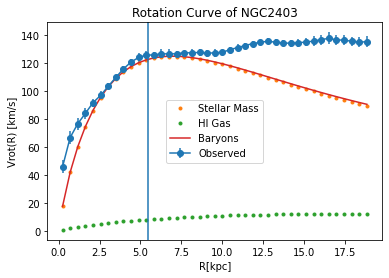

In [7]:
#plotting
plt.errorbar(R,Vobs,yerr=VobsErr,fmt='-o', label='Observed')
plt.plot(R,Vstar,'.', label='Stellar Mass')
plt.plot(R,Vgas,'.',label='HI Gas')
plt.plot(R,Vbar, label='Baryons')
plt.title('Rotation Curve of NGC2403')
plt.xlabel('R[kpc]')
plt.ylabel('Vrot(R) [km/s]')
plt.axvline(x=R_E)
#plt.axis([1.5,20.5,0,150])
plt.legend()
plt.show()

In [8]:
#Dark matter Fractions

f_dm=1-(Vbar**2/Vobs**2)

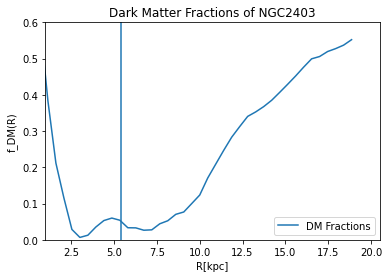

In [9]:
plt.plot(R,f_dm, label='DM Fractions')
plt.title('Dark Matter Fractions of NGC2403')
plt.xlabel('R[kpc]')
plt.ylabel('f_DM(R)')
plt.axvline(x=R_E)
plt.axis([1.0,20.5,0.0,0.6])
plt.legend()
plt.show()